**Uso de uma Rede Neural Recorrente, para prever investimentos na bolsa de valores**

A base de dados representa investimentos nas ações da Petrobas na bolsa de valores, com o histórico do ano de 2013 ao ano de 2018, em tempos de crise. Dessa forma, o objetivo principal do modelo é gerar um gráfico dos preços das ações, mesmo em tempos de crise.

Você pode encontrar a base de dados, em:

https://br.financas.yahoo.com/

Importações iniciais

In [89]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

Carregando da base de dados de treinamento

In [90]:
dataFrame = pd.read_csv('petr4_treinamento.csv')

A base de treino é composta pelas seguintes features:

* Date - Referente à data de abertura da ação;

* Open - Referente ao valor na abertura da ação;

* High - Referente ao valor máximo da ação;

* Low - Referente ao valor mínimo da ação;

* Close - Referente ao valor que a ação foi fechada;

* Adj Close - Referente ao valor real previsto pela ação;

* Volume - Total de investimentos

In [91]:
dataFrame

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
5,2013-01-09,19.639999,19.870001,19.459999,19.680000,18.077084,24361100.0
6,2013-01-10,19.770000,20.049999,19.540001,19.830000,18.214869,17526200.0
7,2013-01-11,19.850000,20.040001,19.700001,19.879999,18.260794,18223600.0
8,2013-01-14,20.010000,20.240000,19.690001,19.719999,18.113827,28302400.0
9,2013-01-15,20.010000,20.240000,19.690001,19.820000,18.205681,29633900.0


**Pré-processamento dos dados**

Em relação ao valores NaN, podemos realizar três ações:

* Exclução desses valores
* Substituição por 0
* Substituir pela média de cada coluna

In [92]:
dataFrame.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

Visto que a quantidade de valores do tipo NaN é relativamente baixa em relação aos 1245 dados do data set, podemos optar por apagar esses registros.

In [93]:
dataFrame = dataFrame.dropna()

In [94]:
dataFrame.shape

(1242, 7)

Dessa forma, podemos verificar se a função dropna(), conseguiu apagar estes valores nulos:

In [95]:
dataFrame.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Nesse cenário, faremos a previsão dos valores das ações com a utilização de múltiplos previsores. Com isso, usaremos todos os atributos da base de dados.

In [96]:
base_treinamento = dataFrame.iloc[:,1:7].values

In [97]:
base_treinamento.shape

(1242, 6)

Nosso modelo trabalha com valores reais, podemos dizer assim. Dessa forma, podemos encontrar valores muito altos, que podem influenciar no treinamento. Para resolver essa problemática, podemos escolher duas opções:

* Normalização dos dados

* Padronização dos dados

Ambas as técnicas trabalham com o um único objetivo: deixar os dados na mesma grandeza. Para isso, veremos como cada uma trabalha, de forma individual:

**Normalização**

![Min-Max fórmula](https://miro.medium.com/max/202/1*9N7QdpE_CfvkTyirk7_oWw.png)

**Padronização**

<img src="https://d1whtlypfis84e.cloudfront.net/guides/wp-content/uploads/2020/04/04155631/1426878678.png " alt="drawing" width="150"/>

Neste modelo, vamos utilizar a técnica de **Normalização**, visto a tratar os outliers nos nossos dados.

In [98]:
from sklearn.preprocessing import MinMaxScaler

Para normalizar esse dados, vamos utilizar a função MinMaxScaler(), que irá transformar os dados em uma escala de 0 e 1.

In [99]:
normalizador = MinMaxScaler(feature_range = [0,1])

In [100]:
base_treinamento_normalizer = normalizador.fit_transform(base_treinamento)

In [101]:
normalizador_previsao = MinMaxScaler(feature_range = [0,1])

normalizador_previsao.fit_transform(base_treinamento[:, 0:1])

array([[0.76501938],
       [0.7562984 ],
       [0.78149225],
       ...,
       [0.57122093],
       [0.57655039],
       [0.57655039]])

In [102]:
base_treinamento_normalizer

array([[0.76501938, 0.77266112, 0.79682707, 0.76080559, 0.6838135 ,
        0.04318274],
       [0.7562984 , 0.78187106, 0.79733884, 0.79567784, 0.71590949,
        0.0437121 ],
       [0.78149225, 0.79253519, 0.82139202, 0.79715132, 0.71726583,
        0.05170752],
       ...,
       [0.57122093, 0.57537562, 0.60696008, 0.58202356, 0.58202349,
        0.03369652],
       [0.57655039, 0.57489089, 0.60798362, 0.5844794 , 0.58447937,
        0.02720006],
       [0.57655039, 0.57343674, 0.61310133, 0.5844794 , 0.58447937,
        0.        ]])

**Estrutura da base para previsão temporal I**

Quando trabalha-se com dados temporais é preciso definir um intervalo de tempo entre os dados e o alvo. Neste caso, podemos pegar um registro que tenha registros anteriores. 

Exemplo: 

| Dia da semana | Dia | Preço |
|---------------|-----|-------|
| Quinta-feira  | 03  | 19,99 |
| Sexta-feira   | 04  | 19,80 |
| Segunda-feira | 07  | 20,33 |
| Terça-feira   | 08  | 20,48 |
| Quarta-feira  | 09  | 20,11 |

Para prever o preço da Quarta-feira, dia 09, precisamos pegar os valores das 4 datas anteriores:

| **Previsores** |   **Preço real**|
|---------------|-----|
| 19,99 19,80 20,33 20,48 20,11  | 20,11  |


**Estrutura da base para previsão temporal II**

* Prever o preço real através do 90 valores anteriores

In [103]:
previsores = []
preco_real = []

for i in range(90, 1242):
    previsores.append(base_treinamento_normalizer[i-90:i, 0:6])
    preco_real.append(base_treinamento_normalizer[i, 0])

In [104]:
previsores, preco_real = np.array(previsores), np.array(preco_real)

In [105]:
previsores.shape

(1152, 90, 6)

Com a utilização da biblioteca Keras, nosso vetor de entradas precisa manter uma dimensão 3D com o formato:

                (batch_size, timesteps, input_dim)
Sendo:

* Batch_size - refere-se ao número de exemplos de treinamento usados em uma intereção

* Timesteps - refere-se a descrição da forma dos dados

* Input_dim - refere-se ao número de entradas

**Estrutura da Rede Neural Recorrente**

In [106]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1],6)))
regressor.add(Dropout(0.3))

In [107]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

In [108]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

In [109]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

In [110]:
regressor.add(Dense(units = 1,activation = 'sigmoid'))

In [111]:
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error',
                  metrics = ['mean_squared_error'])

Para termos acesso às estatísticas e detalhes matemáticos do modelo, usaremos uma classe do Keras, chamada callbacks.

* A função **EarlyStopping** para o treinamento, quando alguma métrica não apresenta bons resultados durante o treino

* A função **ReduceLROnPlateau** reduz a taxa de aprendizagem, quando alguma métrica não está funcionando bem

* A função **ModelCheckpoint** salva os pesos após cada epóca

In [112]:
es = EarlyStopping(monitor = 'loss', min_delta = 1e-10, patience = 10, verbose = 1)

rlr = ReduceLROnPlateau(monitor = 'loss', factor = 0.2, patience = 5, verbose = 1)

mcp = ModelCheckpoint(filepath = 'pesos.h5', monitor = 'loss', save_best_only = True, verbose = 1)

In [113]:
regressor.fit(previsores, preco_real, epochs = 100, batch_size = 32,
             callbacks = [es, rlr, mcp])

Epoch 1/100
1152/1152 [==============================] - 8s 7ms/step - loss: 0.0213 - mean_squared_error: 0.0213

Epoch 00001: loss improved from inf to 0.02130, saving model to pesos.h5
Epoch 2/100
1152/1152 [==============================] - 6s 5ms/step - loss: 0.0076 - mean_squared_error: 0.0076

Epoch 00002: loss improved from 0.02130 to 0.00759, saving model to pesos.h5
Epoch 3/100
1152/1152 [==============================] - 6s 5ms/step - loss: 0.0063 - mean_squared_error: 0.0063

Epoch 00003: loss improved from 0.00759 to 0.00628, saving model to pesos.h5
Epoch 4/100
1152/1152 [==============================] - 6s 5ms/step - loss: 0.0051 - mean_squared_error: 0.0051

Epoch 00004: loss improved from 0.00628 to 0.00507, saving model to pesos.h5
Epoch 5/100
1152/1152 [==============================] - 6s 5ms/step - loss: 0.0045 - mean_squared_error: 0.0045

Epoch 00005: loss improved from 0.00507 to 0.00450, saving model to pesos.h5
Epoch 6/100
1152/1152 [==========================

1152/1152 [==============================] - 6s 5ms/step - loss: 9.7070e-04 - mean_squared_error: 9.7070e-04

Epoch 00045: loss did not improve from 0.00094
Epoch 46/100
1152/1152 [==============================] - 6s 5ms/step - loss: 9.5126e-04 - mean_squared_error: 9.5126e-04

Epoch 00046: loss did not improve from 0.00094
Epoch 47/100
1152/1152 [==============================] - 6s 5ms/step - loss: 0.0010 - mean_squared_error: 0.0010

Epoch 00047: loss did not improve from 0.00094
Epoch 48/100
1152/1152 [==============================] - 6s 5ms/step - loss: 9.5673e-04 - mean_squared_error: 9.5673e-04

Epoch 00048: loss did not improve from 0.00094
Epoch 49/100
1152/1152 [==============================] - 6s 5ms/step - loss: 9.4098e-04 - mean_squared_error: 9.4098e-04

Epoch 00049: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.

Epoch 00049: loss improved from 0.00094 to 0.00094, saving model to pesos.h5
Epoch 50/100
1152/1152 [==============================] - 6

**Previsão de preços de ações**

Carregando da base de dados

In [132]:
base_teste = pd.read_csv('petr4_teste.csv')

In [133]:
base_teste.shape

(22, 7)

Como estamos fazendo o uso apenas da feature **Open**, vamos extrai-la:

In [134]:
preco_real_teste = base_teste.iloc[:,1:2].values

Precisamos trabalhar com tipos de dados iguais, para evitar erros com a nossa Rede Neural Recorrente, para isso vamos concatenar as suas bases(treino e teste), para facilitar igualdade de tipos.

In [135]:
frames = [dataFrame, base_teste]

In [136]:
frames

[            Date       Open       High        Low      Close  Adj Close  \
 0     2013-01-02  19.990000  20.209999  19.690001  19.690001  18.086271   
 1     2013-01-03  19.809999  20.400000  19.700001  20.400000  18.738441   
 2     2013-01-04  20.330000  20.620001  20.170000  20.430000  18.766001   
 3     2013-01-07  20.480000  20.670000  19.950001  20.080000  18.444506   
 4     2013-01-08  20.110001  20.230000  19.459999  19.500000  17.911745   
 5     2013-01-09  19.639999  19.870001  19.459999  19.680000  18.077084   
 6     2013-01-10  19.770000  20.049999  19.540001  19.830000  18.214869   
 7     2013-01-11  19.850000  20.040001  19.700001  19.879999  18.260794   
 8     2013-01-14  20.010000  20.240000  19.690001  19.719999  18.113827   
 9     2013-01-15  20.010000  20.240000  19.690001  19.820000  18.205681   
 10    2013-01-16  19.889999  19.889999  19.600000  19.840000  18.224054   
 11    2013-01-17  19.860001  19.930000  19.600000  19.709999  18.104639   
 12    2013-

In [137]:
base_completa = pd.concat(frames)

Como nosso atributos são númericos, vamos deletar a coluna Date.

In [138]:
base_completa = base_completa.drop('Date', axis = 1)

In [139]:
base_completa.shape

(1264, 6)

In [140]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values

Em seguida, colocaremos nossos dados na mesma escala.

In [141]:
entradas = normalizador.transform(entradas)
entradas.shape

(112, 6)

Precisamos colocar nossos dados de teste em uma lista. Dessa forma, iremos preencher nosso vetor X_teste.

In [142]:
X_teste = []
for i in range(90,112):
    X_teste.append(entradas[i-90:i, 0:6])

X_teste = np.array(X_teste)

In [143]:
X_teste.shape

(22, 90, 6)

Agora, iremos realizar nossas previções:

In [144]:
previsoes = regressor.predict(X_teste)

Para visualizarmos as previsoes, iremos fazer um processo inverso à normalização. Dessa forma, iremos visualizar os preços em escalas reais ao início. 

In [145]:
previsoes = normalizador_previsao.inverse_transform(previsoes)

Podemos observar que as previsões não ficaram distantes aos valores reais. Dessa maneira, podemos visualizar a média das previsoes e a média do preço real:

In [146]:
previsoes.mean()

17.767471

In [147]:
preco_real_teste.mean()

17.87454563636364

In [130]:
diferenca = previsoes.mean() - preco_real_teste.mean()
print(diferenca)

-0.10707432288707608


Para visualizarmos o quanto as previsoes puderam se aproximar dos valores reais, podemos fazer um gráfico com ambos os vetores. Para isso, vamos utilizar a biblioteca **matplotlib**, para plotar esses valores.

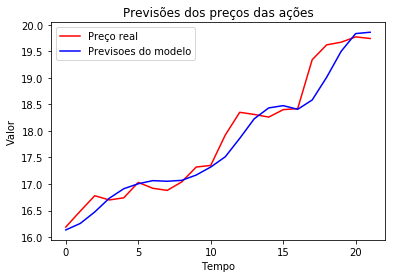

In [131]:
plt.plot(preco_real_teste, color = 'red', label = 'Preço real')
plt.plot(previsoes, color = 'blue', label = 'Previsoes do modelo')
plt.title('Previsões dos preços das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

**Referências**

https://www.udemy.com/course/deep-learning-com-python-az-curso-completo/learn/lecture/10897310#questions

https://translate.googleusercontent.com/translate_c?depth=1&hl=pt-BR&prev=search&rurl=translate.google.com&sl=en&sp=nmt4&u=https://stackoverflow.com/questions/38714959/understanding-keras-lstms&usg=ALkJrhgwRgxszeum-5XuG2HTiE0KM75Wog

https://www.google.com/search?q=LSTM&client=ubuntu&hs=DAN&channel=fs&sxsrf=ALeKk02TzfQeiFwQ3Hw3VX9kUWN9kBiJ6g:1592424774740&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiBip7I1InqAhU0D7kGHfcuDHsQ_AUoAXoECA8QAw

https://keras.io/api/callbacks/